In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
os.chdir(r'C:\Users\user\Downloads\UDEMY\datasets\2019 DSN data')

In [3]:
test = pd.read_csv('test_data.csv')
train = pd.read_csv('train_data.csv')

In [4]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [5]:
def modern(df,mod):
    if mod=='Building_Painted':
        df.loc[df[mod]=='N' , mod] = 1
        df.loc[df[mod]== 'V', mod] = 0
    elif mod=='Building_Fenced':
        df.loc[df[mod]=='N' , mod] = 1
        df.loc[df[mod]== 'V', mod] = 0
    elif mod=='Garden':
        df.loc[df[mod]=='V' , mod] = 1
        df.loc[df[mod]== 'O', mod] = 0
    elif mod=='Settlement':
        df.loc[df[mod]== 'U', mod] = 1
        df.loc[df[mod]== 'R', mod] = 0

In [6]:
def window(df,win):
    df.loc[df[win]=='   .', win] = 0
    df.loc[df[win]=='1', win] = 1
    df.loc[df[win]=='2', win] = 1
    df.loc[df[win]=='3', win] = 1
    df.loc[df[win]=='4', win] = 1
    df.loc[df[win]=='5', win] = 2
    df.loc[df[win]=='6', win] = 2
    df.loc[df[win]=='7', win] = 2
    df.loc[df[win]=='8', win] = 2
    df.loc[df[win]=='9', win] = 3
    df.loc[df[win]=='>=10', win] = 3

In [7]:
window(train,'NumberOfWindows')
modern(train,'Building_Painted')
modern(train,'Building_Fenced')
modern(train,'Garden')
modern(train,'Settlement')

In [8]:
train['Garden'].fillna(0,inplace=True)
train['Geo_Code'].fillna(6088, inplace=True)
train.fillna(train.median(), inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null int64
Building_Fenced       7160 non-null int64
Garden                7160 non-null int64
Settlement            7160 non-null int64
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     7160 non-null float64
NumberOfWindows       7160 non-null int64
Geo_Code              7160 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(9), object(2)
memory usage: 783.2+ KB


In [10]:
train['house'] = train['Residential']+train['Building_Type']+train['NumberOfWindows']
train['modern'] = train['Building_Fenced']+train['Garden']+train['Settlement']+train['Building_Painted']+train['NumberOfWindows']

In [11]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,house,modern
0,H14663,2013,1.0,0,1,0,1,1,290.0,1,1960.0,0,1053,0,1,3
1,H2037,2015,1.0,0,0,1,0,0,490.0,1,1850.0,1,1053,0,2,2
2,H3802,2014,1.0,0,1,0,1,1,595.0,1,1960.0,0,1053,0,1,3
3,H3834,2013,1.0,0,0,0,1,1,2840.0,1,1960.0,0,1053,0,1,2
4,H5053,2014,1.0,0,0,1,0,0,680.0,1,1800.0,1,1053,0,2,2


1. check for the relationship between insured period and Yearofobservation
2. there is a relationship between date_of_occupancy and building dimension, check for the optimal way for it to be mapped
3. analyze Geocode well

In [12]:
train.insert(3,'finished_or_not',True)

In [13]:
train.loc[train['Insured_Period']==1, 'finished_or_not'] = 1
train.loc[train['Insured_Period']!=1, 'finished_or_not'] = 0

In [14]:
train['finished_or_not'].value_counts()

1    5325
0    1835
Name: finished_or_not, dtype: int64

In [15]:
pd.crosstab(train['finished_or_not'],train['Claim'],normalize='index',margins=True)

Claim,0,1
finished_or_not,,
0,0.818529,0.181471
1,0.755681,0.244319
All,0.771788,0.228212


In [16]:
train.corr()

,YearOfObservation,Insured_Period,finished_or_not,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,house,modern
YearOfObservation,1.000000,0.025434,-0.292323,-0.040391,-0.056881,0.120373,-0.120238,-0.120103,0.010959,0.005490,-0.030230,0.098599,-0.016367,0.043938,-0.008760
Insured_Period,0.025434,1.000000,0.641229,-0.037620,0.037077,0.047091,-0.047196,-0.046504,0.008822,-0.017811,-0.010523,0.041275,0.088715,-0.000418,0.049215
finished_or_not,-0.292323,0.641229,1.000000,-0.029522,0.024934,-0.006606,0.006442,0.006918,-0.015684,-0.001234,-0.001591,-0.004585,0.065379,-0.012214,0.019627
Residential,-0.040391,-0.037620,-0.029522,1.000000,0.032927,0.082448,-0.082263,-0.082684,0.056357,0.334039,-0.036885,0.123576,0.063509,0.578430,0.137543
Building_Painted,-0.056881,0.037077,0.024934,0.032927,1.000000,-0.574757,0.574919,0.575081,-0.089176,0.048541,0.094140,-0.500919,-0.029857,-0.228152,0.590159
Building_Fenced,0.120373,0.047091,-0.006606,0.082448,-0.574757,1.000000,-0.999721,-0.999441,0.136512,0.020430,-0.175703,0.873328,0.051657,0.505689,-0.075576
Garden,-0.120238,-0.047196,0.006442,-0.082263,0.574919,-0.999721,1.000000,0.999721,-0.136466,-0.020375,0.175622,-0.874118,-0.052171,-0.506022,0.075291
Settlement,-0.120103,-0.046504,0.006918,-0.082684,0.575081,-0.999441,0.999721,1.000000,-0.136369,-0.020320,0.175581,-0.873874,-0.052019,-0.505985,0.076058
Building Dimension,0.010959,0.008822,-0.015684,0.056357,-0.089176,0.136512,-0.136466,-0.136369,1.000000,0.009184,0.196190,0.269538,0.295558,0.167275,0.210182
Building_Type,0.005490,-0.017811,-0.001234,0.334039,0.048541,0.020430,-0.020375,-0.020320,0.009184,1.000000,-0.137001,0.100198,0.112168,0.777227,0.173128


Text(0, 0.5, 'Date of occupancy')

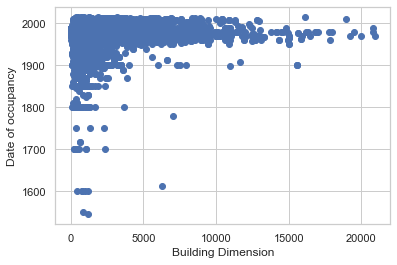

In [17]:
plt.scatter(y=train['Date_of_Occupancy'], x=train['Building Dimension'])
plt.xlabel('Building Dimension')
plt.ylabel('Date of occupancy')

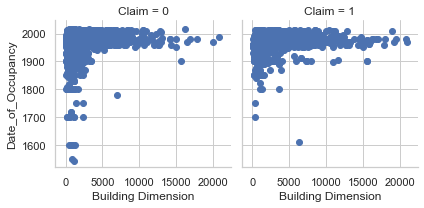

In [18]:
g=sns.FacetGrid(data=train, col= 'Claim')
g.map(plt.scatter, 'Building Dimension', 'Date_of_Occupancy')

In [19]:
train.insert(11, 'Rich_or_Poor',train['Building Dimension']*train['Date_of_Occupancy'])

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 18 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
finished_or_not       7160 non-null int64
Residential           7160 non-null int64
Building_Painted      7160 non-null int64
Building_Fenced       7160 non-null int64
Garden                7160 non-null int64
Settlement            7160 non-null int64
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
Rich_or_Poor          7160 non-null float64
Date_of_Occupancy     7160 non-null float64
NumberOfWindows       7160 non-null int64
Geo_Code              7160 non-null object
Claim                 7160 non-null int64
house                 7160 non-null int64
modern                7160 non-null int64
dtypes: float64(4), int64(12), object(2)
memory usage: 1007.0+ KB


In [21]:
del(train['Residential'],train['Building_Painted'],train['Building_Fenced'],train['Garden'],train['Settlement'],train['Building Dimension'],train['Building_Type'],train['Date_of_Occupancy'],train['NumberOfWindows'])

In [22]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,finished_or_not,Rich_or_Poor,Geo_Code,Claim,house,modern
0,H14663,2013,1.0,1,568400.0,1053,0,1,3
1,H2037,2015,1.0,1,906500.0,1053,0,2,2
2,H3802,2014,1.0,1,1166200.0,1053,0,1,3
3,H3834,2013,1.0,1,5566400.0,1053,0,1,2
4,H5053,2014,1.0,1,1224000.0,1053,0,2,2


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 9 columns):
Customer Id          7160 non-null object
YearOfObservation    7160 non-null int64
Insured_Period       7160 non-null float64
finished_or_not      7160 non-null int64
Rich_or_Poor         7160 non-null float64
Geo_Code             7160 non-null object
Claim                7160 non-null int64
house                7160 non-null int64
modern               7160 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 503.5+ KB


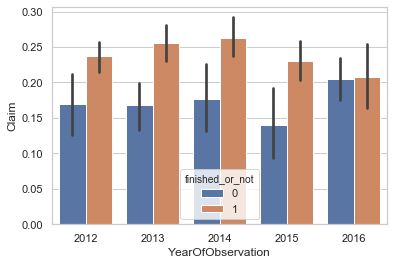

In [24]:
sns.barplot( x=train['YearOfObservation'], y=train['Claim'], hue=train['finished_or_not'])

In [25]:
train['YearOfObservation']=train['YearOfObservation'].map({2012:0,2013:1,2014:2,2015:3,2016:4})

In [26]:
pd.crosstab(train['YearOfObservation'],train['Claim'],normalize='index',margins=True)

Claim,0,1
YearOfObservation,,
0,0.772336,0.227664
1,0.765875,0.234125
2,0.752367,0.247633
3,0.784186,0.215814
4,0.793864,0.206136
All,0.771788,0.228212


In [27]:
train['tested'] = train['YearOfObservation'] * train['finished_or_not']

In [28]:
train.corr()

,YearOfObservation,Insured_Period,finished_or_not,Rich_or_Poor,Claim,house,modern,tested
YearOfObservation,1.000000,0.025434,-0.292323,0.010790,-0.016367,0.043938,-0.008760,0.523724
Insured_Period,0.025434,1.000000,0.641229,0.008706,0.088715,-0.000418,0.049215,0.322612
finished_or_not,-0.292323,0.641229,1.000000,-0.015804,0.065379,-0.012214,0.019627,0.503114
Rich_or_Poor,0.010790,0.008706,-0.015804,1.000000,0.294397,0.164720,0.208655,-0.007041
Claim,-0.016367,0.088715,0.065379,0.294397,1.000000,0.154465,0.112346,0.025347
house,0.043938,-0.000418,-0.012214,0.164720,0.154465,1.000000,0.307379,0.029735
modern,-0.008760,0.049215,0.019627,0.208655,0.112346,0.307379,1.000000,0.004339
tested,0.523724,0.322612,0.503114,-0.007041,0.025347,0.029735,0.004339,1.000000


In [29]:
pd.crosstab(train['tested'],train['Claim'],normalize='index',margins=True)

Claim,0,1
tested,,
0,0.792672,0.207328
1,0.744322,0.255678
2,0.737168,0.262832
3,0.769657,0.230343
4,0.792570,0.207430
All,0.771788,0.228212


In [30]:
del(train['tested'])

In [31]:
train.head(20)

,Customer Id,YearOfObservation,Insured_Period,finished_or_not,Rich_or_Poor,Geo_Code,Claim,house,modern
0,H14663,1,1.000000,1,568400.0,1053,0,1,3
1,H2037,3,1.000000,1,906500.0,1053,0,2,2
2,H3802,2,1.000000,1,1166200.0,1053,0,1,3
3,H3834,1,1.000000,1,5566400.0,1053,0,1,2
4,H5053,2,1.000000,1,1224000.0,1053,0,2,2
5,H4977,0,1.000000,1,1059300.0,1143,0,2,2
6,H7390,0,1.000000,1,5626040.0,1143,0,1,3
7,H14488,3,1.000000,1,9844576.0,1160,0,1,3
8,H19355,2,1.000000,1,5505555.0,1173,1,2,2
9,H18601,3,1.000000,1,1045720.0,1224,0,2,2


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 9 columns):
Customer Id          7160 non-null object
YearOfObservation    7160 non-null int64
Insured_Period       7160 non-null float64
finished_or_not      7160 non-null int64
Rich_or_Poor         7160 non-null float64
Geo_Code             7160 non-null object
Claim                7160 non-null int64
house                7160 non-null int64
modern               7160 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 503.5+ KB


In [33]:
k=train['Geo_Code'].value_counts()

In [34]:
train.insert(5,'GC',train['Geo_Code'].map(k))

In [35]:
train.corr()

,YearOfObservation,Insured_Period,finished_or_not,Rich_or_Poor,GC,Claim,house,modern
YearOfObservation,1.000000,0.025434,-0.292323,0.010790,-0.017736,-0.016367,0.043938,-0.008760
Insured_Period,0.025434,1.000000,0.641229,0.008706,-0.038107,0.088715,-0.000418,0.049215
finished_or_not,-0.292323,0.641229,1.000000,-0.015804,-0.004114,0.065379,-0.012214,0.019627
Rich_or_Poor,0.010790,0.008706,-0.015804,1.000000,-0.049595,0.294397,0.164720,0.208655
GC,-0.017736,-0.038107,-0.004114,-0.049595,1.000000,0.034749,0.220260,0.064384
Claim,-0.016367,0.088715,0.065379,0.294397,0.034749,1.000000,0.154465,0.112346
house,0.043938,-0.000418,-0.012214,0.164720,0.220260,0.154465,1.000000,0.307379
modern,-0.008760,0.049215,0.019627,0.208655,0.064384,0.112346,0.307379,1.000000


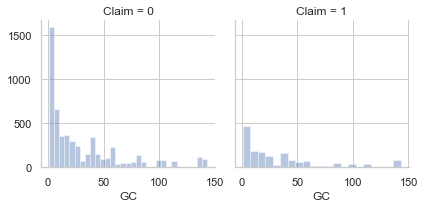

In [36]:
g = sns.FacetGrid(train, col='Claim')
g.map(sns.distplot,'GC',kde=False)

In [37]:
train['gcBand'] = pd.cut(train['GC'], 4)
train[['gcBand', 'Claim']].groupby(['gcBand'], as_index=False).mean().sort_values(by='gcBand', ascending=True)

,gcBand,Claim
0,"(0.858, 36.5]",0.219840
1,"(36.5, 72.0]",0.254054
2,"(72.0, 107.5]",0.185255
3,"(107.5, 143.0]",0.290076


In [38]:
train.loc[train['GC']<=36.5, 'Geo_Code'] = 0
train.loc[(train['GC']>36.5 ) & (train['GC']<=72.0), 'Geo_Code'] = 1
train.loc[(train['GC']>72.0) & (train['GC']<= 107.5), 'Geo_Code'] = 2
train.loc[train['GC']>107.5, 'Geo_Code'] = 3 

In [39]:
train.tail()

,Customer Id,YearOfObservation,Insured_Period,finished_or_not,Rich_or_Poor,GC,Geo_Code,Claim,house,modern,gcBand
7155,H5290,0,1.000000,1,2167083.0,102,2,0,2,2,"(72.0, 107.5]"
7156,H5926,1,1.000000,1,2144340.0,102,2,1,2,2,"(72.0, 107.5]"
7157,H6204,4,0.038251,0,2157336.0,102,2,0,1,2,"(72.0, 107.5]"
7158,H6537,1,1.000000,1,2135676.0,102,2,0,1,2,"(72.0, 107.5]"
7159,H7470,2,1.000000,1,2170332.0,102,2,0,1,2,"(72.0, 107.5]"


In [40]:
train['house_location'] = train['Geo_Code'] * train['house']

In [41]:
del(train['GC'],train['gcBand'],train['finished_or_not'],train['Geo_Code'])

In [42]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Rich_or_Poor,Claim,house,modern,house_location
0,H14663,1,1.0,568400.0,0,1,3,0
1,H2037,3,1.0,906500.0,0,2,2,0
2,H3802,2,1.0,1166200.0,0,1,3,0
3,H3834,1,1.0,5566400.0,0,1,2,0
4,H5053,2,1.0,1224000.0,0,2,2,0


In [43]:
train.corr()

,YearOfObservation,Insured_Period,Rich_or_Poor,Claim,house,modern,house_location
YearOfObservation,1.000000,0.025434,0.010790,-0.016367,0.043938,-0.008760,-0.001021
Insured_Period,0.025434,1.000000,0.008706,0.088715,-0.000418,0.049215,-0.029912
Rich_or_Poor,0.010790,0.008706,1.000000,0.294397,0.164720,0.208655,0.013023
Claim,-0.016367,0.088715,0.294397,1.000000,0.154465,0.112346,0.062717
house,0.043938,-0.000418,0.164720,0.154465,1.000000,0.307379,0.394057
modern,-0.008760,0.049215,0.208655,0.112346,0.307379,1.000000,0.120198
house_location,-0.001021,-0.029912,0.013023,0.062717,0.394057,0.120198,1.000000


In [44]:
train['house_location'].value_counts()

0     4758
4      451
2      444
3      379
5      237
6      212
12     137
8      126
15     113
7       89
18      72
1       58
21      36
9       25
10      23
Name: house_location, dtype: int64

In [45]:
from sklearn.preprocessing import  StandardScaler

In [46]:
train[['Rich_or_Poor','house_location']] = StandardScaler().fit_transform(train[['Rich_or_Poor','house_location']])

In [47]:
k=train['Claim']
train=train.drop(['Customer Id','Claim'],axis=1)

In [48]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict

In [49]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [50]:
X_train,X_test,y_train,y_test = train_test_split(train,k,
                                                 stratify=k,
                                                 test_size=0.3,
                                                 random_state=0)

In [51]:
model2 = CatBoostClassifier()
model2.fit(X_train,y_train)
print(roc_auc_score(y_train,model2.predict_proba(X_train)[:,-1]))
print(roc_auc_score(y_test,model2.predict_proba(X_test)[:,-1]))

Learning rate set to 0.020504
0:	learn: 0.6834911	total: 128ms	remaining: 2m 7s
1:	learn: 0.6741295	total: 132ms	remaining: 1m 5s
2:	learn: 0.6652307	total: 136ms	remaining: 45.2s
3:	learn: 0.6575888	total: 140ms	remaining: 34.9s
4:	learn: 0.6495844	total: 144ms	remaining: 28.6s
5:	learn: 0.6422161	total: 148ms	remaining: 24.5s
6:	learn: 0.6349337	total: 152ms	remaining: 21.5s
7:	learn: 0.6277708	total: 156ms	remaining: 19.3s
8:	learn: 0.6211172	total: 160ms	remaining: 17.6s
9:	learn: 0.6145515	total: 164ms	remaining: 16.2s
10:	learn: 0.6085127	total: 168ms	remaining: 15.1s
11:	learn: 0.6024249	total: 172ms	remaining: 14.1s
12:	learn: 0.5968688	total: 176ms	remaining: 13.3s
13:	learn: 0.5921770	total: 178ms	remaining: 12.5s
14:	learn: 0.5868951	total: 182ms	remaining: 12s
15:	learn: 0.5822437	total: 187ms	remaining: 11.5s
16:	learn: 0.5777215	total: 203ms	remaining: 11.7s
17:	learn: 0.5735571	total: 207ms	remaining: 11.3s
18:	learn: 0.5692318	total: 212ms	remaining: 10.9s
19:	learn: 0.

184:	learn: 0.4609274	total: 908ms	remaining: 4s
185:	learn: 0.4607802	total: 912ms	remaining: 3.99s
186:	learn: 0.4607038	total: 916ms	remaining: 3.98s
187:	learn: 0.4606436	total: 921ms	remaining: 3.98s
188:	learn: 0.4605645	total: 925ms	remaining: 3.97s
189:	learn: 0.4605178	total: 929ms	remaining: 3.96s
190:	learn: 0.4604224	total: 934ms	remaining: 3.96s
191:	learn: 0.4603635	total: 939ms	remaining: 3.95s
192:	learn: 0.4603456	total: 944ms	remaining: 3.95s
193:	learn: 0.4602004	total: 948ms	remaining: 3.94s
194:	learn: 0.4600877	total: 953ms	remaining: 3.94s
195:	learn: 0.4599885	total: 957ms	remaining: 3.93s
196:	learn: 0.4598415	total: 961ms	remaining: 3.92s
197:	learn: 0.4597269	total: 967ms	remaining: 3.92s
198:	learn: 0.4596637	total: 971ms	remaining: 3.91s
199:	learn: 0.4595576	total: 975ms	remaining: 3.9s
200:	learn: 0.4594678	total: 979ms	remaining: 3.89s
201:	learn: 0.4594223	total: 983ms	remaining: 3.88s
202:	learn: 0.4593555	total: 987ms	remaining: 3.88s
203:	learn: 0.45

349:	learn: 0.4483025	total: 1.6s	remaining: 2.98s
350:	learn: 0.4482568	total: 1.61s	remaining: 2.97s
351:	learn: 0.4481862	total: 1.61s	remaining: 2.97s
352:	learn: 0.4481228	total: 1.61s	remaining: 2.96s
353:	learn: 0.4480974	total: 1.62s	remaining: 2.96s
354:	learn: 0.4480741	total: 1.63s	remaining: 2.95s
355:	learn: 0.4479466	total: 1.63s	remaining: 2.95s
356:	learn: 0.4478885	total: 1.64s	remaining: 2.94s
357:	learn: 0.4478261	total: 1.64s	remaining: 2.94s
358:	learn: 0.4476407	total: 1.65s	remaining: 2.94s
359:	learn: 0.4474981	total: 1.65s	remaining: 2.93s
360:	learn: 0.4474039	total: 1.65s	remaining: 2.93s
361:	learn: 0.4473511	total: 1.66s	remaining: 2.92s
362:	learn: 0.4473001	total: 1.66s	remaining: 2.92s
363:	learn: 0.4472238	total: 1.67s	remaining: 2.91s
364:	learn: 0.4471564	total: 1.67s	remaining: 2.9s
365:	learn: 0.4471046	total: 1.67s	remaining: 2.9s
366:	learn: 0.4470689	total: 1.68s	remaining: 2.89s
367:	learn: 0.4470032	total: 1.68s	remaining: 2.89s
368:	learn: 0.4

519:	learn: 0.4363138	total: 2.31s	remaining: 2.13s
520:	learn: 0.4362567	total: 2.31s	remaining: 2.13s
521:	learn: 0.4362332	total: 2.32s	remaining: 2.12s
522:	learn: 0.4361424	total: 2.32s	remaining: 2.12s
523:	learn: 0.4360606	total: 2.33s	remaining: 2.12s
524:	learn: 0.4360055	total: 2.33s	remaining: 2.11s
525:	learn: 0.4359454	total: 2.34s	remaining: 2.11s
526:	learn: 0.4358882	total: 2.34s	remaining: 2.1s
527:	learn: 0.4357846	total: 2.35s	remaining: 2.1s
528:	learn: 0.4357179	total: 2.35s	remaining: 2.09s
529:	learn: 0.4356451	total: 2.35s	remaining: 2.09s
530:	learn: 0.4355381	total: 2.36s	remaining: 2.08s
531:	learn: 0.4354672	total: 2.36s	remaining: 2.08s
532:	learn: 0.4353778	total: 2.37s	remaining: 2.07s
533:	learn: 0.4352779	total: 2.37s	remaining: 2.07s
534:	learn: 0.4351837	total: 2.37s	remaining: 2.06s
535:	learn: 0.4351203	total: 2.38s	remaining: 2.06s
536:	learn: 0.4350227	total: 2.38s	remaining: 2.05s
537:	learn: 0.4348972	total: 2.38s	remaining: 2.05s
538:	learn: 0.

690:	learn: 0.4239094	total: 3.02s	remaining: 1.35s
691:	learn: 0.4238399	total: 3.03s	remaining: 1.35s
692:	learn: 0.4238050	total: 3.03s	remaining: 1.34s
693:	learn: 0.4237154	total: 3.04s	remaining: 1.34s
694:	learn: 0.4236427	total: 3.04s	remaining: 1.33s
695:	learn: 0.4235771	total: 3.05s	remaining: 1.33s
696:	learn: 0.4235358	total: 3.05s	remaining: 1.33s
697:	learn: 0.4235023	total: 3.05s	remaining: 1.32s
698:	learn: 0.4234626	total: 3.06s	remaining: 1.32s
699:	learn: 0.4234422	total: 3.06s	remaining: 1.31s
700:	learn: 0.4233287	total: 3.07s	remaining: 1.31s
701:	learn: 0.4232686	total: 3.07s	remaining: 1.3s
702:	learn: 0.4231852	total: 3.07s	remaining: 1.3s
703:	learn: 0.4231533	total: 3.08s	remaining: 1.29s
704:	learn: 0.4230928	total: 3.08s	remaining: 1.29s
705:	learn: 0.4230053	total: 3.09s	remaining: 1.28s
706:	learn: 0.4229358	total: 3.09s	remaining: 1.28s
707:	learn: 0.4229057	total: 3.09s	remaining: 1.28s
708:	learn: 0.4228447	total: 3.1s	remaining: 1.27s
709:	learn: 0.4

864:	learn: 0.4127265	total: 3.73s	remaining: 582ms
865:	learn: 0.4126645	total: 3.73s	remaining: 578ms
866:	learn: 0.4125856	total: 3.74s	remaining: 573ms
867:	learn: 0.4125535	total: 3.74s	remaining: 569ms
868:	learn: 0.4124837	total: 3.75s	remaining: 565ms
869:	learn: 0.4124311	total: 3.75s	remaining: 561ms
870:	learn: 0.4123752	total: 3.75s	remaining: 556ms
871:	learn: 0.4123117	total: 3.76s	remaining: 552ms
872:	learn: 0.4122711	total: 3.76s	remaining: 548ms
873:	learn: 0.4121585	total: 3.77s	remaining: 543ms
874:	learn: 0.4120441	total: 3.77s	remaining: 539ms
875:	learn: 0.4119528	total: 3.77s	remaining: 534ms
876:	learn: 0.4118946	total: 3.78s	remaining: 530ms
877:	learn: 0.4118551	total: 3.78s	remaining: 526ms
878:	learn: 0.4117798	total: 3.79s	remaining: 521ms
879:	learn: 0.4117250	total: 3.79s	remaining: 517ms
880:	learn: 0.4116776	total: 3.79s	remaining: 513ms
881:	learn: 0.4116481	total: 3.8s	remaining: 508ms
882:	learn: 0.4115739	total: 3.8s	remaining: 504ms
883:	learn: 0.

In [52]:
gbr= GradientBoostingClassifier(random_state=0)
gbr.fit(X_train, y_train)

print(roc_auc_score(y_train, gbr.predict_proba(X_train)[:,-1]))
print(roc_auc_score(y_test, gbr.predict_proba(X_test)[:,-1]))

0.7719799267433705
0.6931722508062332


In [53]:
gbr= GradientBoostingClassifier(random_state=0)
gbr.fit(X_train, y_train)

print(roc_auc_score(y_train, gbr.predict(X_train)))
print(roc_auc_score(y_test, gbr.predict(X_test)))

0.6100051706308169
0.5802577484552326


In [97]:
li = XGBClassifier()
li.fit(X_train,y_train)
print(roc_auc_score(y_train,li.predict_proba(X_train)[:,-1]))
print(roc_auc_score(y_test,li.predict_proba(X_test)[:,-1]))

0.7607596804694788
0.6947600994559464


In [55]:
kf = StratifiedKFold(shuffle=True, n_splits=10)

In [56]:
cross_val = cross_val_score(estimator=li, X=train,y=k,scoring='roc_auc', cv=kf)
print(cross_val)
print(cross_val.mean())
print(cross_val.std())

[0.7000838  0.71912076 0.70898756 0.69935055 0.70660314 0.69783335
 0.72511003 0.70250956 0.73435138 0.72076443]
0.7114714549440355
0.011946346263869145


In [57]:
cross_val = cross_val_score(estimator=li, X=train,y=k,scoring='roc_auc', cv=kf)
print(cross_val)
print(cross_val.mean())
print(cross_val.std())

[0.6604276  0.67977881 0.69029242 0.75014886 0.75275408 0.73326751
 0.67243487 0.70657175 0.72896661 0.71998088]
0.7094623396654139
0.031015644556822597


In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [59]:
log = LogisticRegression()

In [60]:
volt = VotingClassifier(estimators=[('lr',log),('xg',li),('gb',gbr),('ca',model2)],voting='soft')

In [61]:
volt.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Learning rate set to 0.020504
0:	learn: 0.6834911	total: 4.11ms	remaining: 4.11s
1:	learn: 0.6741295	total: 7.98ms	remaining: 3.98s
2:	learn: 0.6652307	total: 11.9ms	remaining: 3.96s
3:	learn: 0.6575888	total: 15.9ms	remaining: 3.95s
4:	learn: 0.6495844	total: 19.8ms	remaining: 3.94s
5:	learn: 0.6422161	total: 23.6ms	remaining: 3.92s
6:	learn: 0.6349337	total: 27.6ms	remaining: 3.91s
7:	learn: 0.6277708	total: 31.6ms	remaining: 3.91s
8:	learn: 0.6211172	total: 35.5ms	remaining: 3.91s
9:	learn: 0.6145515	total: 39.5ms	remaining: 3.91s
10:	learn: 0.6085127	total: 43.4ms	remaining: 3.9s
11:	learn: 0.6024249	total: 47.4ms	remaining: 3.9s
12:	learn: 0.5968688	total: 51.3ms	remaining: 3.89s
13:	learn: 0.5921770	total: 53.9ms	remaining: 3.79s
14:	learn: 0.5868951	total: 57.8ms	remaining: 3.8s
15:	learn: 0.5822437	total: 61.8ms	remaining: 3.8s
16:	learn: 0.5777215	total: 65.8ms	remaining: 3.8s
17:	learn: 0.5735571	total: 69.7ms	remaining: 3.8s
18:	learn: 0.5692318	total: 73.3ms	remaining: 3.79

168:	learn: 0.4625533	total: 714ms	remaining: 3.51s
169:	learn: 0.4624963	total: 719ms	remaining: 3.51s
170:	learn: 0.4623299	total: 723ms	remaining: 3.5s
171:	learn: 0.4622233	total: 731ms	remaining: 3.52s
172:	learn: 0.4621503	total: 736ms	remaining: 3.52s
173:	learn: 0.4621409	total: 739ms	remaining: 3.51s
174:	learn: 0.4620437	total: 743ms	remaining: 3.5s
175:	learn: 0.4619347	total: 749ms	remaining: 3.5s
176:	learn: 0.4618076	total: 753ms	remaining: 3.5s
177:	learn: 0.4616778	total: 757ms	remaining: 3.5s
178:	learn: 0.4615068	total: 762ms	remaining: 3.5s
179:	learn: 0.4614570	total: 766ms	remaining: 3.49s
180:	learn: 0.4613868	total: 771ms	remaining: 3.49s
181:	learn: 0.4612904	total: 776ms	remaining: 3.49s
182:	learn: 0.4610995	total: 780ms	remaining: 3.48s
183:	learn: 0.4610067	total: 784ms	remaining: 3.48s
184:	learn: 0.4609274	total: 789ms	remaining: 3.48s
185:	learn: 0.4607802	total: 793ms	remaining: 3.47s
186:	learn: 0.4607038	total: 797ms	remaining: 3.47s
187:	learn: 0.4606

327:	learn: 0.4496072	total: 1.41s	remaining: 2.88s
328:	learn: 0.4494962	total: 1.41s	remaining: 2.88s
329:	learn: 0.4494951	total: 1.41s	remaining: 2.87s
330:	learn: 0.4494779	total: 1.42s	remaining: 2.87s
331:	learn: 0.4494257	total: 1.42s	remaining: 2.86s
332:	learn: 0.4493603	total: 1.43s	remaining: 2.86s
333:	learn: 0.4493116	total: 1.43s	remaining: 2.85s
334:	learn: 0.4492222	total: 1.44s	remaining: 2.85s
335:	learn: 0.4491541	total: 1.44s	remaining: 2.85s
336:	learn: 0.4491138	total: 1.44s	remaining: 2.84s
337:	learn: 0.4490274	total: 1.45s	remaining: 2.84s
338:	learn: 0.4490013	total: 1.45s	remaining: 2.83s
339:	learn: 0.4488968	total: 1.46s	remaining: 2.83s
340:	learn: 0.4488187	total: 1.46s	remaining: 2.82s
341:	learn: 0.4487668	total: 1.46s	remaining: 2.82s
342:	learn: 0.4486748	total: 1.47s	remaining: 2.81s
343:	learn: 0.4486300	total: 1.47s	remaining: 2.81s
344:	learn: 0.4485763	total: 1.48s	remaining: 2.8s
345:	learn: 0.4485486	total: 1.48s	remaining: 2.8s
346:	learn: 0.

512:	learn: 0.4367740	total: 2.28s	remaining: 2.16s
513:	learn: 0.4367132	total: 2.29s	remaining: 2.16s
514:	learn: 0.4366585	total: 2.29s	remaining: 2.16s
515:	learn: 0.4365883	total: 2.3s	remaining: 2.16s
516:	learn: 0.4365152	total: 2.31s	remaining: 2.15s
517:	learn: 0.4364461	total: 2.31s	remaining: 2.15s
518:	learn: 0.4363739	total: 2.31s	remaining: 2.15s
519:	learn: 0.4363138	total: 2.32s	remaining: 2.14s
520:	learn: 0.4362567	total: 2.32s	remaining: 2.13s
521:	learn: 0.4362332	total: 2.33s	remaining: 2.13s
522:	learn: 0.4361424	total: 2.33s	remaining: 2.13s
523:	learn: 0.4360606	total: 2.33s	remaining: 2.12s
524:	learn: 0.4360055	total: 2.34s	remaining: 2.12s
525:	learn: 0.4359454	total: 2.34s	remaining: 2.11s
526:	learn: 0.4358882	total: 2.35s	remaining: 2.11s
527:	learn: 0.4357846	total: 2.35s	remaining: 2.1s
528:	learn: 0.4357179	total: 2.35s	remaining: 2.1s
529:	learn: 0.4356451	total: 2.36s	remaining: 2.09s
530:	learn: 0.4355381	total: 2.36s	remaining: 2.09s
531:	learn: 0.4

704:	learn: 0.4230928	total: 3.12s	remaining: 1.31s
705:	learn: 0.4230053	total: 3.13s	remaining: 1.3s
706:	learn: 0.4229358	total: 3.13s	remaining: 1.3s
707:	learn: 0.4229057	total: 3.14s	remaining: 1.29s
708:	learn: 0.4228447	total: 3.14s	remaining: 1.29s
709:	learn: 0.4227455	total: 3.15s	remaining: 1.28s
710:	learn: 0.4226271	total: 3.15s	remaining: 1.28s
711:	learn: 0.4225275	total: 3.16s	remaining: 1.28s
712:	learn: 0.4224546	total: 3.16s	remaining: 1.27s
713:	learn: 0.4223981	total: 3.17s	remaining: 1.27s
714:	learn: 0.4223354	total: 3.17s	remaining: 1.26s
715:	learn: 0.4222835	total: 3.17s	remaining: 1.26s
716:	learn: 0.4222017	total: 3.18s	remaining: 1.25s
717:	learn: 0.4220932	total: 3.18s	remaining: 1.25s
718:	learn: 0.4219172	total: 3.19s	remaining: 1.25s
719:	learn: 0.4218720	total: 3.19s	remaining: 1.24s
720:	learn: 0.4217962	total: 3.19s	remaining: 1.24s
721:	learn: 0.4217074	total: 3.2s	remaining: 1.23s
722:	learn: 0.4216394	total: 3.2s	remaining: 1.23s
723:	learn: 0.42

872:	learn: 0.4122711	total: 3.83s	remaining: 557ms
873:	learn: 0.4121585	total: 3.83s	remaining: 553ms
874:	learn: 0.4120441	total: 3.84s	remaining: 548ms
875:	learn: 0.4119528	total: 3.84s	remaining: 544ms
876:	learn: 0.4118946	total: 3.85s	remaining: 539ms
877:	learn: 0.4118551	total: 3.85s	remaining: 535ms
878:	learn: 0.4117798	total: 3.85s	remaining: 530ms
879:	learn: 0.4117250	total: 3.86s	remaining: 526ms
880:	learn: 0.4116776	total: 3.86s	remaining: 522ms
881:	learn: 0.4116481	total: 3.87s	remaining: 517ms
882:	learn: 0.4115739	total: 3.87s	remaining: 513ms
883:	learn: 0.4115301	total: 3.87s	remaining: 508ms
884:	learn: 0.4114521	total: 3.88s	remaining: 504ms
885:	learn: 0.4113424	total: 3.88s	remaining: 500ms
886:	learn: 0.4112937	total: 3.89s	remaining: 495ms
887:	learn: 0.4112694	total: 3.89s	remaining: 491ms
888:	learn: 0.4112085	total: 3.89s	remaining: 486ms
889:	learn: 0.4111081	total: 3.9s	remaining: 482ms
890:	learn: 0.4110064	total: 3.9s	remaining: 477ms
891:	learn: 0.

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('xg',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsamp...
                                                         

In [62]:
print(roc_auc_score(y_train,volt.predict_proba(X_train)[:,-1]))
print(roc_auc_score(y_test,volt.predict_proba(X_test)[:,-1]))

0.7861656021073032
0.6934633563920141


# TEST SET


In [63]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
Customer Id           3069 non-null object
YearOfObservation     3069 non-null int64
Insured_Period        3069 non-null float64
Residential           3069 non-null int64
Building_Painted      3069 non-null object
Building_Fenced       3069 non-null object
Garden                3065 non-null object
Settlement            3069 non-null object
Building Dimension    3056 non-null float64
Building_Type         3069 non-null int64
Date_of_Occupancy     2341 non-null float64
NumberOfWindows       3069 non-null object
Geo_Code              3056 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [65]:
window(test,'NumberOfWindows')
modern(test,'Building_Painted')
modern(test,'Building_Fenced')
modern(test,'Garden')
modern(test,'Settlement')

In [66]:
test.describe(include='all')

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
count,3069,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3065.0,3069.000000,3056.000000,3069.000000,2341.000000,3069.000000,3056
unique,3069,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,697
top,H9917,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6083
freq,1,NaN,NaN,NaN,NaN,NaN,2240.0,NaN,NaN,NaN,NaN,NaN,113
mean,NaN,2013.593679,0.922806,0.224177,0.451287,0.270121,NaN,0.729879,1666.790576,2.359400,1966.781717,0.381883,NaN
std,NaN,1.372138,0.219066,0.417107,0.497702,0.444094,NaN,0.444094,2251.180599,0.998464,25.238702,0.688051,NaN
min,NaN,2012.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,1.000000,1750.000000,0.000000,NaN
25%,NaN,2012.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,470.000000,2.000000,1960.000000,0.000000,NaN
50%,NaN,2013.000000,1.000000,0.000000,0.000000,0.000000,NaN,1.000000,900.000000,2.000000,1968.000000,0.000000,NaN
75%,NaN,2015.000000,1.000000,0.000000,1.000000,1.000000,NaN,1.000000,1957.000000,3.000000,1980.000000,1.000000,NaN


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
Customer Id           3069 non-null object
YearOfObservation     3069 non-null int64
Insured_Period        3069 non-null float64
Residential           3069 non-null int64
Building_Painted      3069 non-null int64
Building_Fenced       3069 non-null int64
Garden                3065 non-null object
Settlement            3069 non-null int64
Building Dimension    3056 non-null float64
Building_Type         3069 non-null int64
Date_of_Occupancy     2341 non-null float64
NumberOfWindows       3069 non-null int64
Geo_Code              3056 non-null object
dtypes: float64(3), int64(7), object(3)
memory usage: 311.8+ KB


In [68]:
test['Garden'].fillna(0,inplace=True)
test['Geo_Code'].fillna(6083, inplace=True)
test.fillna(test.median(), inplace=True)

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
Customer Id           3069 non-null object
YearOfObservation     3069 non-null int64
Insured_Period        3069 non-null float64
Residential           3069 non-null int64
Building_Painted      3069 non-null int64
Building_Fenced       3069 non-null int64
Garden                3069 non-null int64
Settlement            3069 non-null int64
Building Dimension    3069 non-null float64
Building_Type         3069 non-null int64
Date_of_Occupancy     3069 non-null float64
NumberOfWindows       3069 non-null int64
Geo_Code              3069 non-null object
dtypes: float64(3), int64(8), object(2)
memory usage: 311.8+ KB


In [70]:
test['house'] = test['Residential']+test['Building_Type']+test['NumberOfWindows']
test['modern'] = test['Building_Fenced']+test['Garden']+test['Settlement']+test['Building_Painted']+test['NumberOfWindows']

In [71]:
test.insert(11, 'Rich_or_Poor',test['Building Dimension']*test['Date_of_Occupancy'])

In [72]:
del(test['Residential'],test['Building_Painted'],test['Building_Fenced'],test['Garden'],test['Settlement'],test['Building Dimension'],test['Building_Type'],test['Date_of_Occupancy'],test['NumberOfWindows'])

In [91]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Rich_or_Poor,house,modern,house_location
0,H11920,1,1.000000,588000.0,2,2,0
1,H11921,4,0.997268,588000.0,2,2,0
2,H9805,1,0.369863,1548400.0,1,2,0
3,H7493,2,1.000000,2815620.0,2,2,0
4,H7494,4,1.000000,2815620.0,2,2,0


In [74]:
k=test['Geo_Code'].value_counts()

In [75]:
test.insert(5,'GC',test['Geo_Code'].map(k))

In [78]:
test.loc[test['GC']<=36.5, 'Geo_Code'] = 0
test.loc[(test['GC']>36.5 ) & (test['GC']<=72.0), 'Geo_Code'] = 1
test.loc[(test['GC']>72.0) & (test['GC']<= 107.5), 'Geo_Code'] = 2
test.loc[test['GC']>107.5, 'Geo_Code'] = 3 

In [84]:
test['house_location'] = test['Geo_Code'] * test['house']

In [86]:
test['house_location'].value_counts()

0     2266
2      215
4      125
3       78
6       77
12      75
10      52
5       48
8       44
1       42
18      25
15      18
21       3
14       1
Name: house_location, dtype: int64

In [88]:
test['YearOfObservation']=test['YearOfObservation'].map({2012:0,2013:1,2014:2,2015:3,2016:4})

In [90]:
del(test['GC'],test['Geo_Code'])

In [92]:
test[['Rich_or_Poor','house_location']] = StandardScaler().fit_transform(test[['Rich_or_Poor','house_location']])

In [93]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Rich_or_Poor,house,modern,house_location
0,H11920,1,1.000000,-0.606199,2,2,-0.441338
1,H11921,4,0.997268,-0.606199,2,2,-0.441338
2,H9805,1,0.369863,-0.389980,1,2,-0.441338
3,H7493,2,1.000000,-0.104684,2,2,-0.441338
4,H7494,4,1.000000,-0.104684,2,2,-0.441338


In [94]:
cos = test['Customer Id']
del(test['Customer Id'])

In [96]:
test

,YearOfObservation,Insured_Period,Rich_or_Poor,house,modern,house_location
0,1,1.000000,-0.606199,2,2,-0.441338
1,4,0.997268,-0.606199,2,2,-0.441338
2,1,0.369863,-0.389980,1,2,-0.441338
3,2,1.000000,-0.104684,2,2,-0.441338
4,4,1.000000,-0.104684,2,2,-0.441338
5,0,1.000000,0.704830,2,2,-0.441338
6,3,0.986301,-0.724844,2,3,-0.441338
7,1,1.000000,-0.114504,2,2,-0.441338
8,0,1.000000,-0.162593,2,2,-0.441338
9,0,1.000000,-0.206900,2,3,-0.441338


In [98]:
test_pred = li.predict_proba(test)[:,-1]

In [99]:
test_pred

array([0.11137889, 0.10184204, 0.08088659, ..., 0.19210362, 0.14523725,
       0.19210362], dtype=float32)

In [100]:
submission = pd.DataFrame({'Customer Id':cos,'Claim':test_pred})

In [102]:
submission.tail()

,Customer Id,Claim
3064,H11583,0.175960
3065,H11720,0.192104
3066,H11721,0.192104
3067,H12408,0.145237
3068,H9021,0.192104


In [103]:
submission.to_csv('DSN 2019_2.csv',index=False)